In [3]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Q1:

In [4]:
# Load the dataset (change the file path to your dataset)
data = pd.read_csv('StudentsPerformance.csv')

# Print the first few rows of the dataset to understand its structure
display(data)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
math_scores = data['math score']
reading_scores = data['reading score']
writing_scores = data['writing score']

In [6]:
def likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

In [7]:
from scipy.optimize import minimize

# Initial parameter guess
initial_guess = [math_scores.mean(), math_scores.std()]

# Perform MLE for math scores
result = minimize(lambda params: likelihood(params, math_scores), initial_guess)
mu_mle, sigma_mle = result.x

print(f"MLE estimate of mu for math scores: {mu_mle}")
print(f"MLE estimate of sigma for math scores: {sigma_mle}")


MLE estimate of mu for math scores: 66.089
MLE estimate of sigma for math scores: 15.155496761094891


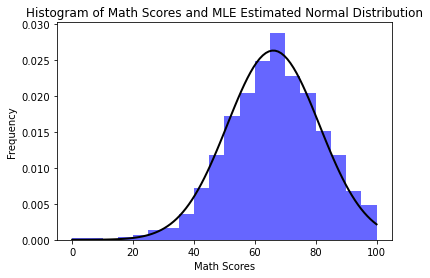

In [8]:
# Create a histogram of math scores
plt.hist(math_scores, bins=20, density=True, alpha=0.6, color='b')

# Create a PDF of the estimated normal distribution for math scores
x = np.linspace(math_scores.min(), math_scores.max(), 100)
pdf = norm.pdf(x, loc=mu_mle, scale=sigma_mle)
plt.plot(x, pdf, 'k-', lw=2)

# Label the plot for math scores
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Math Scores and MLE Estimated Normal Distribution')

# Show the plot
plt.show()


# Q2:

In [15]:
from scipy.optimize import minimize
import numpy as np

# Define the sequence of coin flips (H for heads, T for tails)
coin_flips = ['H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'H', 'H']

# Define the negative log-likelihood function for a binomial distribution
def neg_log_likelihood(p):
 # Calculate the likelihood of the observed sequence
 likelihood = np.prod([p if flip == 'H' else 1 - p for flip in coin_flips])
 # Take the negative natural logarithm of the likelihood
 return -np.log(likelihood)

# Use a numerical optimization method to find the MLE estimate for p
initial_guess = 0.5 # Initial guess for the probability of heads
result = minimize(neg_log_likelihood, initial_guess, method='Nelder-Mead')

# The MLE estimate for the probability of heads (p) is in the result
mle_estimate = result.x[0]

# Print the MLE estimate for p
print("Maximum Likelihood Estimate (MLE) for the probability of heads (p):", mle_estimate)

Maximum Likelihood Estimate (MLE) for the probability of heads (p): 0.7000000000000005


<ipython-input-15-987cae3ef542>:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(likelihood)


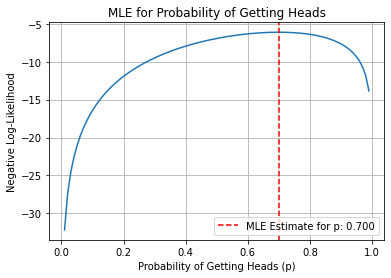

In [16]:
# Create a range of p values for visualization
p_values = np.linspace(0, 1, 100)

# Calculate the negative log-likelihood for each p value
negative_log_likelihoods = [-neg_log_likelihood(p) for p in p_values]

# Visualize the likelihood as a function of p
plt.plot(p_values, negative_log_likelihoods)
plt.axvline(x=mle_estimate, color='r', linestyle='--', label=f'MLE Estimate for p: {mle_estimate:.3f}')
plt.xlabel('Probability of Getting Heads (p)')
plt.ylabel('Negative Log-Likelihood')
plt.title('MLE for Probability of Getting Heads')
plt.legend()
plt.grid(True)
plt.show()
